In [4]:
class SegmentTree:
    def __init__(self, data):
        self.n = len(data)
        self.tree_sum = [0] * (4 * self.n)
        self.tree_min = [0] * (4 * self.n)
        self.tree_max = [0] * (4 * self.n)
        self.build(data, 1, 0, self.n - 1)

    def build(self, data, node, l, r):
        if l == r:
            self.tree_sum[node] = data[l]
            self.tree_min[node] = data[l]
            self.tree_max[node] = data[l]
        else:
            mid = (l + r) // 2
            self.build(data, node * 2, l, mid)
            self.build(data, node * 2 + 1, mid + 1, r)
            self.tree_sum[node] = self.tree_sum[node * 2] + self.tree_sum[node * 2 + 1]
            self.tree_min[node] = min(self.tree_min[node * 2], self.tree_min[node * 2 + 1])
            self.tree_max[node] = max(self.tree_max[node * 2], self.tree_max[node * 2 + 1])

    def query_sum(self, node, l, r, ql, qr):
        if qr < l or ql > r:
            return 0
        if ql <= l and r <= qr:
            return self.tree_sum[node]
        mid = (l + r) // 2
        return self.query_sum(node * 2, l, mid, ql, qr) + \
               self.query_sum(node * 2 + 1, mid + 1, r, ql, qr)

    def query_min(self, node, l, r, ql, qr):
        if qr < l or ql > r:
            return float('inf')
        if ql <= l and r <= qr:
            return self.tree_min[node]
        mid = (l + r) // 2
        return min(self.query_min(node * 2, l, mid, ql, qr),
                   self.query_min(node * 2 + 1, mid + 1, r, ql, qr))

    def query_max(self, node, l, r, ql, qr):
        if qr < l or ql > r:
            return float('-inf')
        if ql <= l and r <= qr:
            return self.tree_max[node]
        mid = (l + r) // 2
        return max(self.query_max(node * 2, l, mid, ql, qr),
                   self.query_max(node * 2 + 1, mid + 1, r, ql, qr))

    def update(self, node, l, r, idx, value):
        if l == r:
            self.tree_sum[node] = value
            self.tree_min[node] = value
            self.tree_max[node] = value
        else:
            mid = (l + r) // 2
            if idx <= mid:
                self.update(node * 2, l, mid, idx, value)
            else:
                self.update(node * 2 + 1, mid + 1, r, idx, value)
            self.tree_sum[node] = self.tree_sum[node * 2] + self.tree_sum[node * 2 + 1]
            self.tree_min[node] = min(self.tree_min[node * 2], self.tree_min[node * 2 + 1])
            self.tree_max[node] = max(self.tree_max[node * 2], self.tree_max[node * 2 + 1])

In [5]:
arr = [1, 2, 3, 4, 5]
st = SegmentTree(arr)

print("Сумма [1,3]:", st.query_sum(1, 0, 4, 1, 3))     # 2 + 3 + 4 = 9
print("Минимум [1,4]:", st.query_min(1, 0, 4, 1, 4))  # min(2,3,4,5) = 2
print("Максимум [0,2]:", st.query_max(1, 0, 4, 0, 2)) # max(1,2,3) = 3

st.update(1, 0, 4, 2, 10)

print("Сумма [1,3] после обновления:", st.query_sum(1, 0, 4, 1, 3))  # 2 + 10 + 4 = 16
print("Максимум [0,2] после обновления:", st.query_max(1, 0, 4, 0, 2))  # max(1,2,10) = 10

Сумма [1,3]: 9
Минимум [1,4]: 2
Максимум [0,2]: 3
Сумма [1,3] после обновления: 16
Максимум [0,2] после обновления: 10


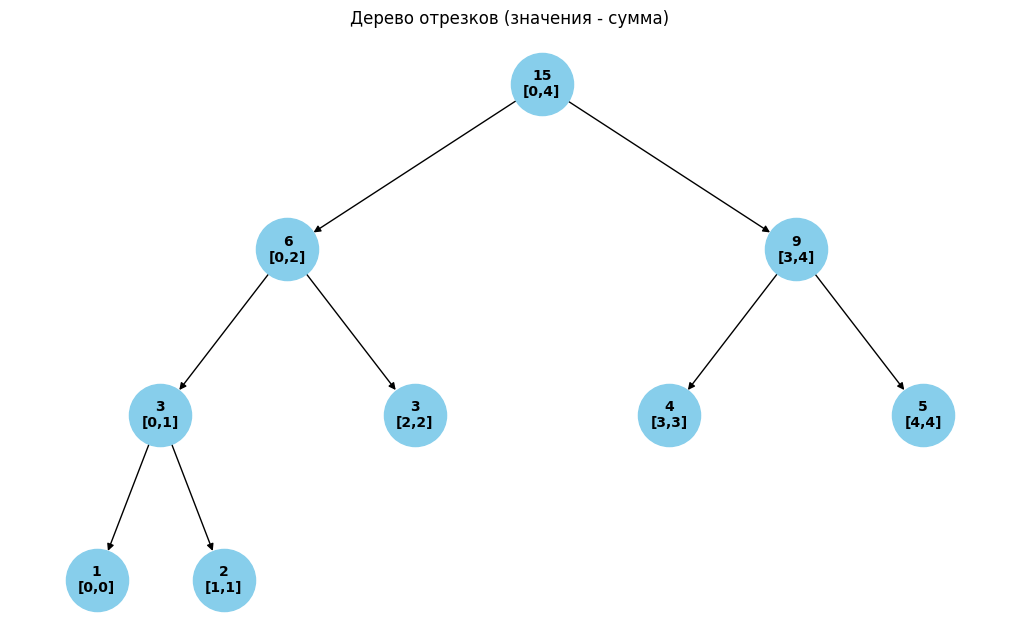

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

class SegmentTreeVisualizer:
    def __init__(self, data):
        self.data = data
        self.tree = [0] * (4 * len(data))
        self.G = nx.DiGraph()
        self.pos = {}
        self.labels = {}
        self._build(1, 0, len(data) - 1, 0.5, 1.0, 0.25)

    def _build(self, node, l, r, x, y, dx):
        if l == r:
            self.tree[node] = self.data[l]
        else:
            m = (l + r) // 2
            self._build(node*2, l, m, x - dx, y - 0.2, dx/2)
            self._build(node*2+1, m+1, r, x + dx, y - 0.2, dx/2)
            self.tree[node] = self.tree[node*2] + self.tree[node*2+1]
            self.G.add_edge(node, node*2)
            self.G.add_edge(node, node*2+1)
        self.pos[node] = (x, y)
        self.labels[node] = f"{self.tree[node]}\n[{l},{r}]"

    def draw(self):
        plt.figure(figsize=(10, 6))
        nx.draw(self.G, pos=self.pos, labels=self.labels, with_labels=True,
                node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
        plt.title("Дерево отрезков (значения - сумма)")
        plt.axis('off')
        plt.show()

# Пример использования
arr = [1, 2, 3, 4, 5]
viz = SegmentTreeVisualizer(arr)
viz.draw()
